In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

## Loading data

In [2]:
path_to_data = Path("../data")
df_train = pd.read_csv(path_to_data / "train.csv")
df_test = pd.read_csv(path_to_data / "test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


No nulls, but missing values in Cabin and Age columns, one Fare value is missing as well

In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Visualizations

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

### Classes imbalance

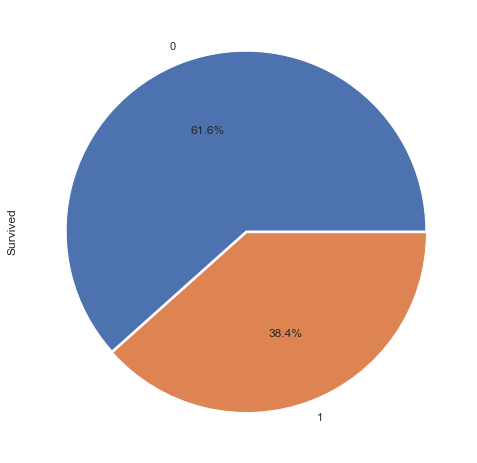

In [16]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.01], autopct="%1.1f%%");

### Sex importance

In [19]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

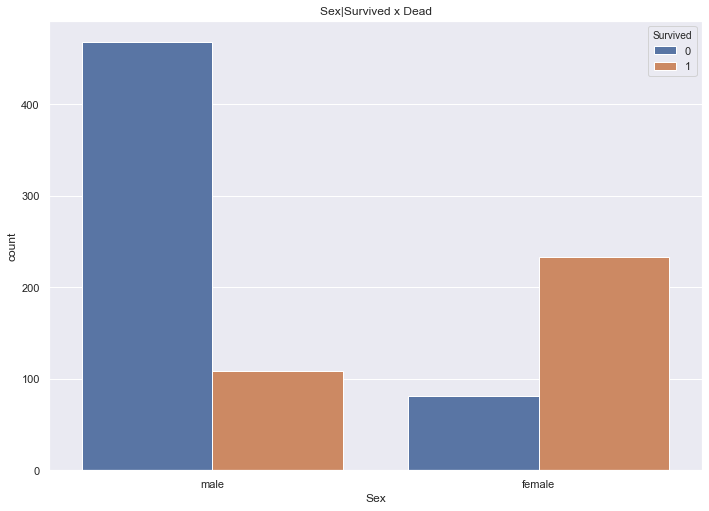

In [30]:
sns.countplot('Sex', hue='Survived', data=df_train).set_title('Sex|Survived x Dead');

### Pclass

i $\rightarrow$ i'th class ticket

In [29]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


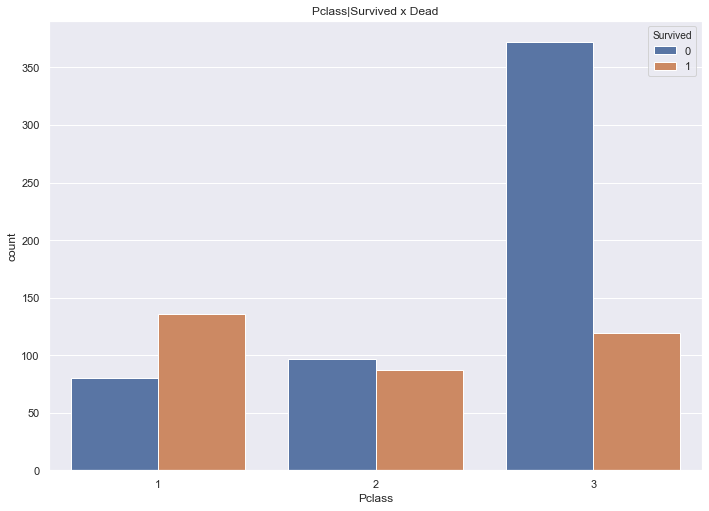

In [33]:
sns.countplot('Pclass', hue='Survived', data=df_train).set_title('Pclass|Survived x Dead');

In [35]:
pd.crosstab([df_train['Sex'], df_train['Survived']], df_train['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

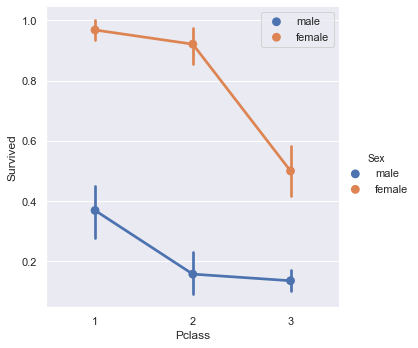

In [53]:
sns.catplot('Pclass', 'Survived', hue='Sex', data=df_train, kind='factor')
plt.legend()
plt.close(1)
plt.show();

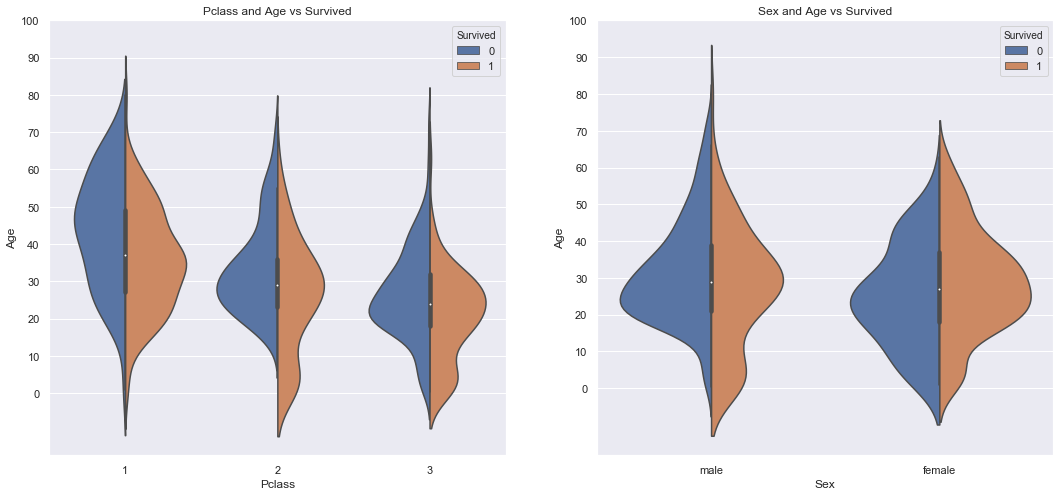

In [55]:
_, axis = plt.subplots(1, 2, figsize=(18, 8))
ticks = range(0,110,10)

sns.violinplot("Pclass","Age", hue="Survived", data=df_train, split=True, ax=axis[0])
axis[0].set_title('Pclass and Age vs Survived')
axis[0].set_yticks(ticks)

sns.violinplot("Sex","Age", hue="Survived", data=df_train, split=True, ax=axis[1])
axis[1].set_title('Sex and Age vs Survived')
axis[1].set_yticks(ticks)
plt.show()

### Leak to fill in missing age values

In [83]:
df_train_copy = df_train.copy()
df_train_copy["train"] = 1
df_test_copy = df_test.copy()
df_test_copy["train"] = 0

merged = pd.concat([df_train_copy, df_test_copy], sort=False)

In [86]:
merged["Salutation"] = merged["Name"].str.extract("([A-Za-z]+)\.")

In [87]:
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [88]:
table_salutations = pd.DataFrame(merged.groupby("Salutation")["Age"].mean())
table_salutations

,Age
Salutation,
Capt,70.000000
Col,54.000000
Countess,33.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000


Save values to input missing in both training and testing data

In [89]:
table_salutations.to_csv(path_to_data / "salutations_table.csv")

In [119]:
salutations_dict = table_salutations.to_dict()["Age"]

### Saved by age

Text(0.5, 1.0, 'Survived')

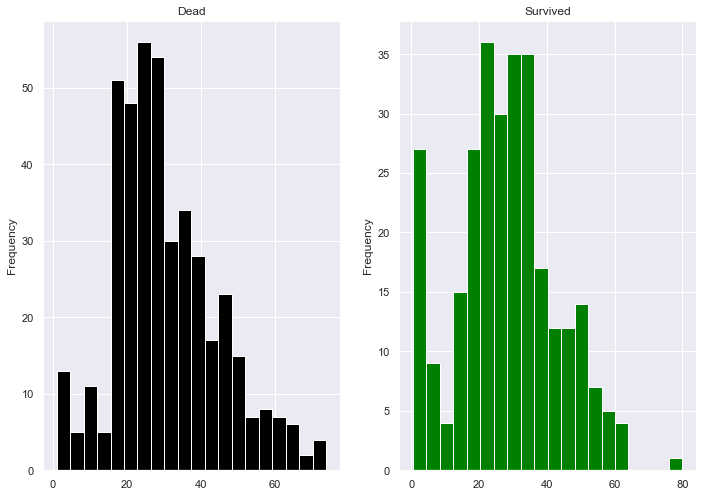

In [97]:
_, axis = plt.subplots(1, 2)
ticks = range(0, 85, 5)

df_train[df_train['Survived'] == 0]["Age"].plot.hist(ax=axis[0], bins=20, color='black')
axis[0].set_title("Dead")

df_train[df_train["Survived"] == 1]["Age"].plot.hist(ax=axis[1], bins=20, color='green')
axis[1].set_title("Survived")

### Embarked feature

In [102]:
pd.crosstab([df_train["Embarked"], df_train["Pclass"]],
            [df_train["Sex"], df_train["Survived"]], 
             margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

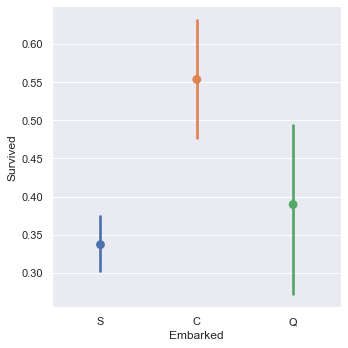

In [109]:
sns.catplot('Embarked','Survived', data=df_train, kind="factor");
plt.close(1)

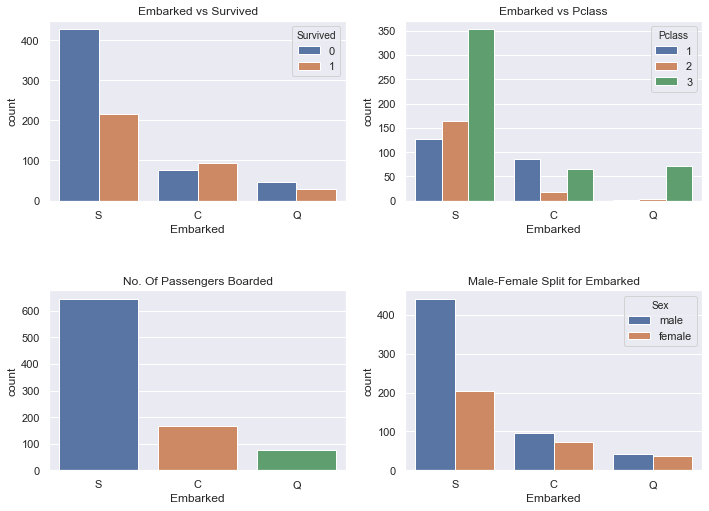

In [114]:
_, axis = plt.subplots(2, 2)

sns.countplot('Embarked', hue='Survived',data=df_train, ax=axis[0, 0])
axis[0, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass',data=df_train, ax=axis[0, 1])
axis[0, 1].set_title('Embarked vs Pclass')

sns.countplot('Embarked', data=df_train, ax=axis[1, 0])
axis[1, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=axis[1, 1])
axis[1, 1].set_title('Male-Female Split for Embarked')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

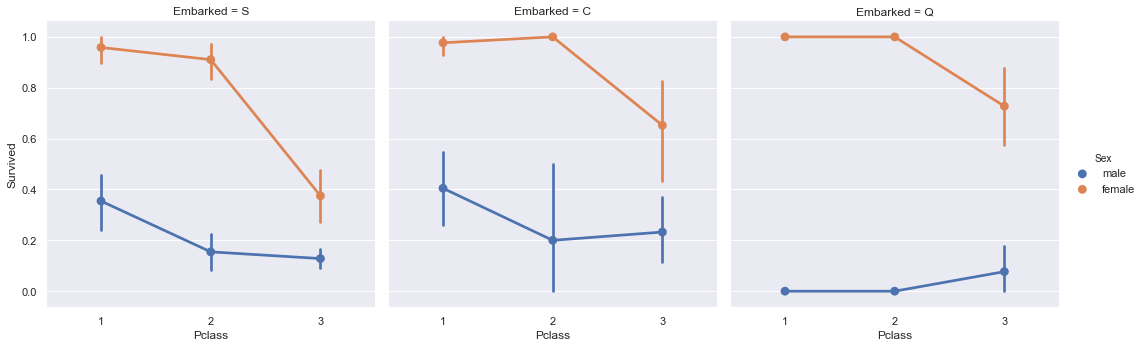

In [118]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data=df_train);

So missing values should be inputed with 'S' port, as majority of passanges boarded from it

### SibSip feature

In [120]:
pd.crosstab([df_train["SibSp"]], df_train["Survived"])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


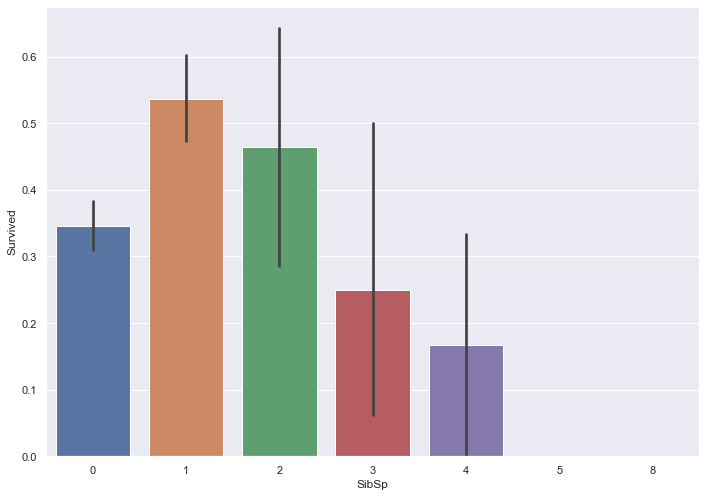

In [134]:
sns.barplot('SibSp', 'Survived', data=df_train);

In [122]:
pd.crosstab(df_train["SibSp"], df_train["Pclass"])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch class

In [123]:
pd.crosstab(df_train["Parch"], df_train["Pclass"])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


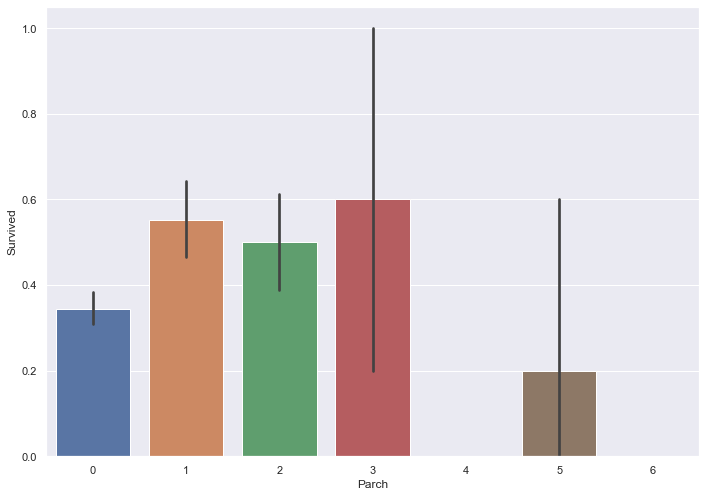

In [132]:
sns.barplot('Parch', 'Survived', data=df_train);

### Face feature

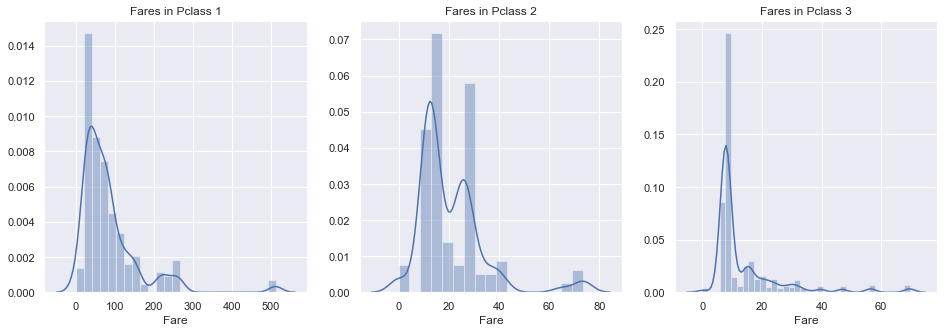

In [140]:
_, axis = plt.subplots(1, 3, figsize=(16, 5))

sns.distplot(df_train[df_train['Pclass'] == 1]["Fare"],ax=axis[0])
axis[0].set_title('Fares in Pclass 1')

sns.distplot(df_train[df_train['Pclass'] == 2]["Fare"],ax=axis[1])
axis[1].set_title('Fares in Pclass 2')

sns.distplot(df_train[df_train['Pclass']==3]["Fare"], ax=axis[2])
axis[2].set_title('Fares in Pclass 3')
plt.show()

### Correlation

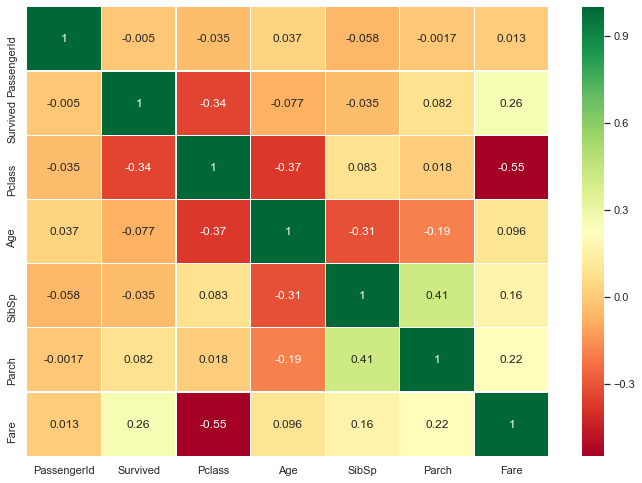

In [151]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig.set_size_inches(10, 8)

# hack for matplotlib regression
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()